In [43]:
#importar las librerias y datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#separar los datos en X y Y
#datos=pd.read_csv("applesFull.csv")
#X=datos.iloc[:, :-1].to_numpy()
#Y=datos.iloc[:, -1].to_numpy()
X=np.array([[0,0], [0,1], [1,0], [1,1]])
Y=np.array([[0], [0], [0], [1]])
#cantidad de ejemplos que tengo en X
n=np.shape(X)[0]
Y=np.reshape(Y, (n,1))

In [11]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [55]:
pesos=np.random.rand(np.shape(X)[1]+1,1)
Xnew=np.c_[np.ones(np.shape(X)[0]), X]
def entrenar(X, Y, pesos):
    alpha=.04
    costos=[]
    for i in range(2000):
        #combinacion linear
        Z=np.dot(X, pesos)
        #activacion
        A=sigmoid(Z)
        #costo de esta iteracion
        J=np.sum(-Y*np.log(A)-(1-Y)*np.log(1-A))/n
        costos.append(J)
        #calcular la derivada
        dw=np.dot(Xnew.T, A-Y)/n
        #actualizar los pesos
        pesos=pesos-(alpha*dw)
    plt.plot(costos)
    plt.show()
    return pesos

def clasificar(X, pesos):
    #combinacion linear
    Z=np.dot(X, pesos)
    #activacion
    A=sigmoid(Z)
    res=[]
    for i in A:
        if i>.5:
            res.append(1)
        else:
            res.append(0)
    return res


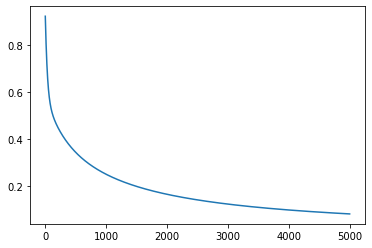

0.5849747657775879


1.0

In [54]:
from sklearn import metrics
pesos=np.random.rand(np.shape(X)[1]+1,1)
Xnew=np.c_[np.ones(np.shape(X)[0]), X]
import time
t0=time.time()
pesos=entrenar(Xnew, Y, pesos)
t1=time.time()
print(t1-t0)
metrics.accuracy_score(Y,clasificar(Xnew, pesos))